A reasonable short‐list for “large and hard” problems (big state/action spaces, strong global‐optimality requirements, and limited samples) are the hybrid EA–RL methods that explicitly combine off‐policy deep RL (which is typically more sample‐efficient) with evolutionary search (which offers better global exploration). 

1. Go-Explore:
   * Its explicit “exploration then robustification” strategy systematically uncovers state–action regions that traditional RL may never visit, making it excellent for hard‐exploration tasks or when you need near‐global solutions
   * Go‐Explore’s original form is most natural for discrete (often Atari‐like) action spaces. If you have very large continuous actions, you may need additional modifications.
  
2. CERL (Collaborative Evolutionary Reinforcement Learning) or ERL (Evolutionary Reinforcement Learning) and variants (e.g., ERL-Re$^2$)
   * They maintain a population of policies under an evolutionary algorithm (global search) and refine individual policies with a gradient‐based off‐policy RL method such as DDPG/SAC (sample‐efficient local search). This pairing yields better exploration (via EA diversity) and good sample‐efficiency (via off‐policy RL).

3. ESAC (Evolutionary Soft Actor–Critic) or SAC–CEPO (Cross‐Entropy Policy Optimization with SAC):
   * SAC is already one of the more sample‐efficient deep RL algorithms for continuous control, and these hybrids inject evolutionary operators to escape local optima and encourage more global exploration.
  


# Notes

1. Evolutionary Algorithms (EAs) are a class of gradient-free, black-box optimization methods. By emulating Darwin's theory of evolution, EAs iteratively evolve solutions. Due to the diversity within populations and the gradient-free random search, EAs have strong exploration ability. As a result, compared to conventional local search algorithms like gradient descent, EAs exhibit better global optimization capabilities within the solution space and are adept at solving multimodal problems. **Moreover, EAs show good robustness and convergence properties, displaying resistance to noise and uncertainty.**

2. However, EAs weakness involve: 1). sensitivity to the design and selection of variation operators, 2). ineffective and redundant exploration arising from random search, 3). low sample efficiency in sequential decision-making problems.

3. 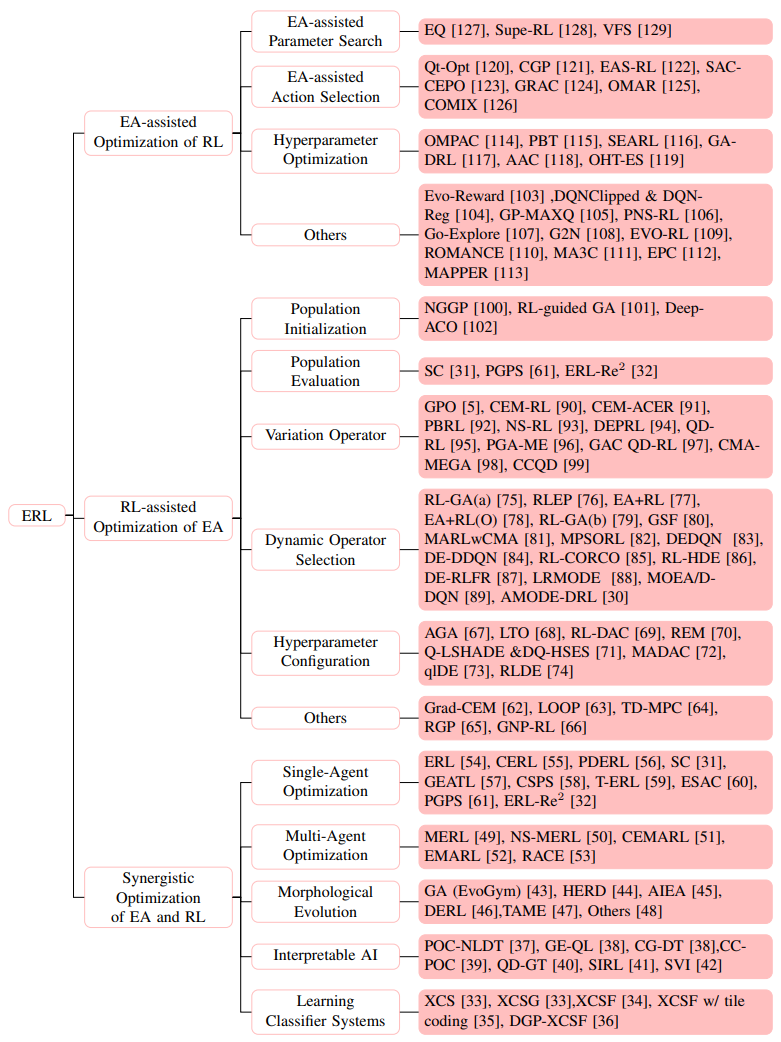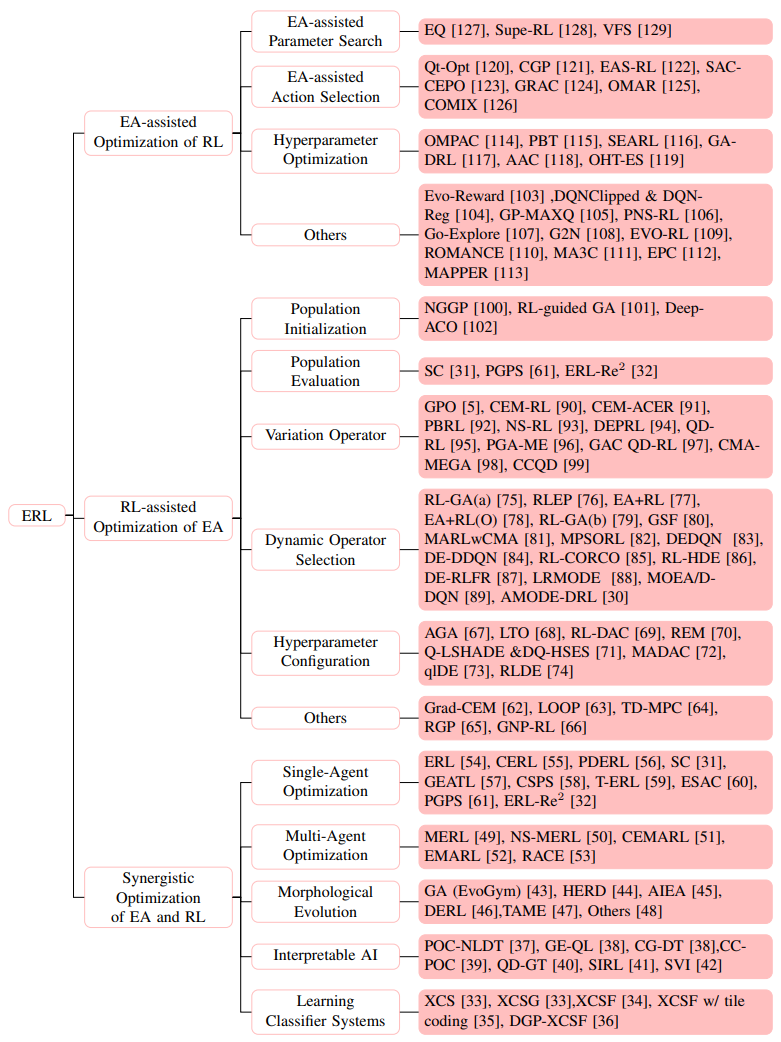 

4. From the perspective of RL:
   Apart from modeling problems as MDPs, RL involves configuring algorihtms, interaction, and learning and optimizing network parameters. This process encounters many optimization challenges, such as hyperparameter optimization, action selection, and network parameter optimizaiton. EAs exhibit strong search capabilities and global optimization power, which can further enhance the **quality of solving such optimization sub-problems within RL.**

5. From the perspective of EAs:
   EAs are a category of optimization algorithms that require iterative searches in the solution space to obtain feasible solutions. This typically involves population initialization, evolution, operator design and selection, and algorithm configuration. However, this process often confronts assorted hurdles, such as how to construct the initial population, which often determines the quality of the final solution; how to perform efficient mutation that avoids redundant and inefficient exploration; and how to dynamically select operators at different stages of optimization to improve performance. **The learning ability of RL enables it to develop strong discriminative guidance and decision-making capabilities.** Incorporating RL into optimization process of EAs has been proven to further enhance the efficiency of EAs.

6. From the perspective of collaboration:
   Two approaches: 1). EAs and RL simultaneously address the same problem and collaborate through some mechanisms; 2). EAs and RL each solve a part of the problem and eventually integrate to form a complete solution.
   THe former approach aims to complement the strengths and weaknesses of EAs and RL in problem-solving: EA's exploration capability compensates for RL's exploration limitations, while RL's experience reuse and fine-grained learning address EAs' sample inefficiency.
   The latter approach involves EAs and RL tackling tasks they excel in individually; for instance, EAs optimizing topology and RL learning control policies.
   

## Contribution of this paper:

1. Conduct a thorough and systematic analysis of the works in the ERL domain, leading to the establishment of three research directions: EA-assisted optimization of RL, RL-assisted optimization of EA, and synergistic optimization of EA and RL.

2. In each direction, further subdivide the works into distinct research branches. Subsequently, conduct an in-depth analysis of the fundamental issues to be addressed and the related algorithms for each branch.

3. Furthermore, point out open challenges within each domain and propose potential research directions to address these challenges.

## Background

* It is worth noting that in sequential decision-making problems, existing EAs typically utilize the policies, i.e., NNs, as individual in the population, and rely on these policies for action decision-making and interaction. Ultimately, they evaluate the population based on the averaged cumulative rewards obtained throughout several episodes of games, followede by evolution in the parameter space. We can observe that EAs struggle to utilize finer-grained information, such as states, actions, and step-level rewards. This is one major factor leading to sample inefficiency.

* **Sequential Decision-making Problems (SDP)** involves modeling the task as a MDP. Through policy control, the agent interacts with the environment and recieves rewards. The ultimate goal is to obtain a policy that maximizes cumulative rewards. Primary tasks: Maze navigation problems and robot control problems.

* Other four types of optimization problems: continuous optimization problems (CTOP); combinatorial optimization problems (COP); multi-objective optimization problems (MOOP); multimodal optimization problems (MMOP).

* CTOP and COP require finding a set of variables $x$ in continuous or discrete spaces to either maximize or minimize the objective function $f(x)$. Typically, such problems come with constraints. CTOP primarily involves the CEC benchmark, while COP involves the Traveling Salesman Problem (TSP), Vehicle Routing Problem (VRP), and Scheduling Problems (SP).

* MOOP involves multiple objective functions, rather than a single one. In MOOP, our goal shifts from seeking a solution to minimize or maximize a single objective function, to finding a set of solutions where each represents an optimal solution across different preferences.

* Unlike MOOP, MMOP deals with situations in single or multi-objective optimization where a single objective function has multiple local optima. The objective of MMOP is to ind all or as many local suboptimal solutions as possible.

* 

### EA-assisted optimization of RL

**EA-assisted parameter search:**

* EQ (exploring critic objectives) employs EAs to replace the conventional Bellman eqeuation for critic optimization. Specifically, EQ maintains a critic population, where each critic optimizes a corresponding actor with policy gradients. The fitness of each critic is based on the scores derived from the interactions between its respective actor and the environment. THe fitness of each critic is based on the scores derived from the interactions between its respective actor and the environment.

* Supe-RL employs GA to auxiliary policy parameter search. At regular intervals, a population of policies is initialized by introducing perturbations to the current RL policy. The population interacts with the environment, and elite individuals soft update their paramters to the RL policy. In off-policy RL, Supe-RL incorporates the elite experiences collected in the genetic evalution phase into the RL replay buffer.

* VFS employs the same idea as Supe-RL but differs by the periodic construction of a critic population. The population is evolved by introducing perturbations of differing scales to the critics. Eventually, the critic with the least deviation from the true value function is chosen to replace the RL critic. The true value function is approximated using unbiased Monte Carlo estimation.

**EA-assisted Action Selection**:
On continuous action tasks, the action space can be vast, making it challenging to determine the optimal actions for optimization and execution, especially in situation involving multimodality or multiple peaks. Traditional RL often employs greedy policies or random sampling from distributions for action selection. However, this approach struggles to accurately capture the best behaviors. Therefore, some works propose the concept of action evolution: initializing a population of actions, evaluating their quality using Q values as fitness, and then selecting the elite action for optimization and interaction. 

* Qt-Opt: initializes a population of random actions from the action space. Under the current state, Qt-Opt applies two iterations of the Cross-Entropy Method (CEM) to the population, guided by the Value Function. The best action is then selected for the critic optimization and interaction.

* CGP: reduces computational burdens by introducing a policy to mimic actions sampled by CEM. In CGP, the critic's training uses CEM-derived actions. Concurrently, a policy is trained using behavior cloning or policy gradients.

* EAS-RL: similar to CGP, different in 1). employing TD3 with the original optimization process and replacing CEM with PSO; 2). integrating both behavior cloning and policy gradients to optimize the policy.

* SAC-CEPO: divides SAC into two parts: a mean network and deviation network. CEM is employed to select the best mean actions, while the mean network is trained through behavior cloning, and the deviation network is learned using the SAC policy gradient. Besides, the generation of the CEM population is no longer based on random sampling, but on sampling from a normal distribution based on learned mean and deviation networks.

* GRAC: introduces three mechanisms to improve Double Q-learning. 1). CEM policy improvement mechanisms to search for the optimal actions, the difference is that CEM policy improvement uses Q-value differences between the optimal actions and the actions taken by the RL policy as advantages to increase the probability of the RL policy selecting the optimal actions. 2). Max-min Double Q-learning to address the underestimation problem of double Q-learning. Specifically, GRAC obtains the CEM action and RL action based on the next state. Subsequently, it utilizes double Q networks to estimate the minimum Q value for the CEM action and the minimum Q value for the RL action. The higher of the two values is selected as the target value.

* OMAR: solves the problem (policy gradient improvements tend to get stuck in local optima due to the complex nature of the value function landscape) by employing a modified version of CEM to select the most optimal actions and uses behavior cloning to fine-tune the policy.

* In the multi-agent estting, COMIX aims to address the problem of QMIX's inapplicability in continuous action spaces. Within COMIX, QMIX is utilized for value function approximation, followed by CEM for action selection.

**EA-assisted Hyperparameter Optimization.**

* OMPAC: employs GA for RL hyperparameter optimization, including the trace-decay rate $\lambda$, discount factor $\gamma$, learning rate $lr$, and temperature $\tau_a$ of softmax action selection. OMPAC trains a population of RL individuals with different hyperparameter configurations and evaluates individuals based on cumulative rewards. After a certain number of iterations, the hyperparameters of non-elite individuals are perturbed by adding Gaussian noise to generate offspring.

* PBT: trains a population of policies with different hyperparameters. After a certain training period, the individuals with high fitness directly replace inferior ones by perturbing their hyperparameters or by resapmling hyperparameters from predefined distributions.

* SEARL: utilizes GA to dynamically adjust the parameters of RL, network architectures (layers, nodes, activation functions), and the learning rates of both actor and critic. SEARL trains a population of RL individuals and stores experiences generated during the population evalution phase in a shared replay buffer. Subsequently, SEARL employs GA to add Gaussian noise to network parameters and modify network architecture, and hyperparameters to form a new population. Then SEARL optimizes the population through DRL based on the shared replay buffer.

* AAC: maintains a population of actor-critic individuals with different hyperparameter configurations and a shared replay buffer. Fitness is defined as the mean of cumulative rewards over multiple episodes. Based on the fitness, the top best and worst individuals are selected. Superior individuals replace inferior ones with hyperparameter perturbations.

* Evo-Reward: constructs a population of reward fnctions and employs PushGP for population evolution to search for more efficient reward functions. Evo-Reward can discover more efficient reward functions than the orignial reward function on the Hungry-Thirsty task.

* Evo-Meta RL: uses EAs to search across diverse environments. Specifically, it transforms the computation process of the loss function into a computational graph and introduces mutations to the operation nodes within it. Evo-Meta RL operates in both inner and outer loops; the outer loop identifies the parent computational structures based on cumulative rewards to generate offspring, while the inner loop conducts gradient optimization based on the structures identified in the outer loop.

* GP-MAXQ: employs GP to explore the hierarchical structure of the hierarchical RL method MAXQ. In GP-MAXQ, GP explores appropriate hierarchies using MAXQ's outputs -> GP can search for more efficient hierarchical structures.

* PNS-RL: aims to improve the exploration capacity of RL. It consists of multiple populations, each comprising multiple exploration policies and one guiding policy. Each exploration policy maintains an actor, critic, and replay buffer, and is optimized through policy gradients along with soft updates towards the guiding policy. In addition, it maintains an archive for selecting the guiding policy. The exploration policy that outperforms the average performance of policies in the archive is added, whereas policies in the archive performing notably worse than the added policy are removed. The most novel individual in the archive is selected as the guiding policy and shared across different populations. Novelty is measured based on the distance in the pre-defined behavioral descriptor space between the agent and its nearest k neighbors.

* Go-Explore builds an archive of trajectories, recording trajectories reaching different states. then it selects the state from the archive that most likely leads to a new state, replicates the trajcetory in the environment based on the archive, reaches that state, and starts random exploration from the state. if the newly reached state is not in the archive or reaches an existing state with a more optimal trajectory, the archive is updated. Then the policy is learned directly through imitation learning. **Go-Explore outperforms other RL algorithms and surpasses human performance in challenging exploration problems Montezuma and Pitfall**.

* ROMANCE: utilizes the QD algorithm to maintain a population of attackers that sporadically attack some collaborators within the team. The attackers employ policy gradients for individual mutation, incorporating regularization terms for maintaining population diversity and attack frequency. ROMANCE demonstrates its superiority over other robust MARL algorithms on the SMAC benchmark.

* EPC: addresses large-scale multi-agent problems by progressively expanding from small to large-scale scenarios in a curriculum-based manner. Larger-scale policies are directly cloned from the policies of the previous scale, but policies that perform well in one scale may not neccessarily be suitable for the next larger scale. Thus EPC trains multiple parallel policies at new scales and uses MADDPG as a mutation operator for improvement, ultimately retaining the best performing policies.


### RL-assisted Optimization of EA

**Population Initialization**
Population initialization is the intial step for all EAs, where solutions are randomly or heuristically provided as initial candidates. A well-designed population initialization can significantly enhance the search efficiency of EAs. High-quality initial solutions can greatly improve algorithm performance. 

* NGGP: to address the symbolic regression problem (SRP), NGGP employs a policy-gradient-guided sequence generator for population initialization. Subsequently, a certain number of GP iterations are conducted, and the top $E$ individuals from the population are combined with the initial population to train the sequence generator. Subsequently, the next iteration process begins.

* RL-guided GA: employs PPO to master and match problem rules and constraints. Then, the trained policies are used for population initialization. In each generation, RL learns to get new policies, which are added to the population.

* DeepACO: utilizes a graph neural network trained with REINFORCE to initialize the heuristic measure of Ant Colony Optimization (ACO). In conventional ACO, the heuristic measure is typically predefined based on expert knowledge. DeepACO uses the probability of RL selecting each node to initialize the heuristic measure, avoiding the introduction of expert knowledge and simultaneuously accelerating the solving efficiency.

**RL-assisted Population Evaluation**
Using RL value functions to evaluate the fitness of EA individuals, thereby improving sample efficiency.

* SC: utilizes the expected Q values estimated using RL critics and experiences as the fitness surrogate to evaluate the population. It proposes two approaches: 1). Probabilistic evaluation using the surrogate. 2). Selecting a population twice the size of the original and filtering half using the surrogate.

* ERL-Re$^2$: introduces H-step bootstrap for population evaluation. Each interacts with the environment for H steps, and then the value function is used to estimate the Q value of (H + 1)th state, which are then summed with the extrinsic rewards in the form of cumulative discount to serve as the fitness. It propabilistically applies H-step bootstrap.


**RL-assisted Variation Operators**
Traditional variation operators are typically gradient-free and rely on random search, which requires extensive exploration to find feasible solutions, resulting in low exploration efficiency. To improve efficiency, some works incorporate the policy gradient guidance into EAs to assist with variation operations. These works can be categorized into two main classes: Single-Objective Optimization and Quality-Diversity Optimization. 

**_Single-Objective Optimization_**
This category of algorithms aims to find solutions that maximize a single objective. 

* GPO: devices gradient-based crossover and mutation by policy distillation and policy gradient algorithm.

* CEM-RL: empoloys the TD3 critic to guide the CEM mutation. In CEM-RL, half of the population is randomly selected and used to optimize the TD3 critic. The policy gradient from the critic is then injected into these selected individuals for mutation. The other half of the population conducts policy search by adding Gaussian noise. 

* PBRL: replacing CEM with a GA while incorporating DDPG for mutations. PBRL allows individuals to interact with the environment for some steps and performs individual gradient optimization using a blend of experiences from the current individual and others. Furthermore, PBRL presents an automated hyperparameter tuning version called Hyperparameter tuning PBRL. In this version, each individual in the population is associated with a corresponding hyperparameter. Gaussian perturbantions are added for hyperparameter mutation. The improvement using the current hyperparameter is used as the fitness.

* NS-RL: integrates DDPG to improve the exploration capabilities. In NS-RL, the fitness is defined as the L2 distance between a policy and the k-nearest policies to it within the behavior characterization space. The most novel individual is selected as the elite, while the less novel individuals are improved by minimizing the difference in their novelty compared to the elite. Furthermore, NS-RL takes the goal as the additional input of the critic to enhance the generalization.

* DEPRL: follows CEM-RL and exmploys maximum mean discrepancy (MMD) to measure the distance among policies as the diversity metric. By concurrently maximizing rewards and MMD with gradient optimization and taking rewards and MMD as the fitness metric, DEPRL improves the diversity and exploration capabilities of the population.


**_Quality-Diversity Optimization_**
Considering two ultimate objectives: 1) solution quality and 2) solution diversity.

* QD-RL: introduces two TD3 critics into the QD framework, one for quality and the other for diversity. The calculation method of diversity is the same as NS-RL. It maintains an archive to save all past policies. At the start of each iteration, it selects individuals from the diversity-qiality Pareto front constructed from the archive. Half of the selected individuals are optimized using the quality critic, and the other half are optimized using the diversity critic. Finally, the offsprings are evaluted and inserted into archive.

* PGA-ME: follows a similar process but differs in that half of the population is mutated using the original operator of Map-Elites, while the other half employs the TD3 critic for mutation. The decisive role of the policy-gradient variation operator in PGA-ME, particularly in the early optimization stages. Moreover, it is shown that PGA-ME demonstrates robust performance in both deterministic and stochastic environments, with solutions found in stochastic settings proving highly reproducible.

* CCQD draws inspiration from ERL-Re$^2$ by similarly decomposing the policy into shared representations and independent policy representations to facilitate knowledge sharing. Unlike ERL-Re$^2$, CCQD maintains multiple shared state representations to construct different knowledge spaces, enhancing the algorithm through a cooperative evolution approach. Each policy requires a unique combination of state representations and policy representations. Based on different shared representations, the behaviors of policies may vary significantly.

* RefQD: also employs the shared state representation and attempts to address the mismatch between old and new policies introduced by the shared state representation in Map-Elites. It periodically re-evaluates the archive and weakens the elitist mechanism of QD by maintaining more decision parts in each archive cell.


**RL-assisted Dynamic Algorithm Configuration**
Challenges: 1). no single EA operator can efficiently solve all problems, leading to the need for a selection of EA operators based on problem characteristics and expert insights. 2). EAs are highly sensitive to hyperparameters, demanding meticulous adjustments. --> Dynamic Algorithms Configuration (DAC)

**_Dynamic Operator Selection_**

* RL-GA: employs $Q(\lambda)$ to enhance GA by dynamic operator and parent type selections. The population itself forms the state and the rewards are defined as the improvement of the offspring compared to the parents. RL selects crossover and mutation opeartors along with specifying the parent types to which these operators should be applied.

* RLEP employs Q-learning to dynamically select four mutation operators for EP. RLEP defines the rewards as the improvements of offspring over parents and directly approximate expected returns for the four mutaion operators.

* EA + RL: employs RL to dynamically select the fitness function to enhance the optimization efficiency of GA under the target fitness. The rewards are defined as the performance differences between the best individuals under the target fitness at sequential gnerations. The states are constructed based on the fitness values of the population.

* EA + RL (O): dynamically employs Q-learning to select crossover and mutation operators for the next generation.

* MARLwCMA: a framework that combines multiple optimization algorithms, including multi-operator DE and CMA-ES. Multi-operator DE dynamically selects mutation operators with the assistance of RL. The rewards are defined as the cumulative performance improvement of offspring generated using the selected operators compared to their parents. THe state contain two variables designed to reflect population diversity and quality.

* MPSORL: the action space consists of four strategies, while states are divided unevenly into five grades based on fitness values. Subsequently, MPSORL selects the optimal strategy fro each particle. To update the Q-table, a reward of 1 is returned if the particle improves; otherwise, a reward of 0 is returned.

* DEDQN: utilizes DQN to dynamically select from three mutation operators in DE, primarily divided into two stages. First stage: DQN is trained, where states are constructed based on the information from fitness landscape theory, inclduing fitness distance correlation and ruggedness of information entropy. The rewards are constructed from the live algebraic and individual evolutionary efficiency. Second stages: the trained DQN selects mutation operators to improve DE.

* DE-DDQN: utilizes DDQN to dynamically select mutation operators for each parent in DE. The RL state space comprises a 99-feature vector to capture the DE's current state. The reward function takes three forms: R1, reflecting the fintess differences between offspring and parents; R2 assigning a higher reward for improvements over the best solution compared to improvements over the parents; R3, concurrently maximizing offspring's fitness differences while minimizing the gap between offspring and the optimal solution.

* RL-CORCO: employs Q-learning to dynamically select two mutation operators for DE in constrained optimization problems. The population is divided into nine subpopulations based on the objective value and the degree of constrained violation, resulting in nine distinct states. Whenever a mutation strategy is applied and it either improves or maintains the performance of the population individuals, a reward of 1 is returned; otherwise, a reward of 0 is given. Additionally, RL-CORCO incorporates a population reinitialization mechanism to prevent it from becoming trapped in local optima.

* RL-HDE: employs Q-learning to dynamically select six
 mutation operators and adjust two trigger parameters for D. To select mutation operators, it divides the population  into 20 states based on diversity and average performanc
 relative to the initiapopopulati. 1: better solution is obtained; 0: nochange; -5: performance worsens. It dynamically adjusts two hyperparameters and constructs 6 states based on a similar definition for operator selection.

* DE-RLFR: employs Q-learning to dynamically select one of three mutation operators for each individual in MOOP. It categorizes fitness of each objective into three levels based on their ranking, resulting in nine states for RL. A reward of 10 is assigned when offspring outperform their parents; otherwise, 0 is returned.

* LRMODE: integrates the findings from a local landscape topology analysis with RL to approximate the optimal probability distribution for dynamically selecting MODE's mutation operators.

* MOEA/D-DQN: utilizes parent solutions and weight vectors as RL states and constructs RL rewards based on fitness improvements. Employs DQN to choose variation operators for MOEAs, leading to superior performance compared to other MOEAs across a diverse range of MOP benchmarks.

* AMODE-DRL: dynamically select five mutation operators and adjusts two continuous parameters in multi-objective scheduling problems. It leverages DQN to select mutaion operators and DDPG to fine-tune continuous parameters. RL states involve the current individual's fitness, fitness improvement, and population diversity. The RL rewards are defined by individual fitness and population diversity.


**_Dynamic Hyperparameter Configuration_**
including crossover probability, mutation rate, population size, and others. 

* AGA: leverages Q-learning to dynamically adjust the EA's crossover rate, mutation rate, tournament size, and population size. The RL states correspond to population information e.g., maximum fitness, mean fitness, and the previous action vector. The reward function is defined as the improvement of the best fitness.

* LTO: utilizes GPS for dynamically adjuting the mutation step-size parameter of CMA-ES. RL states include: current step-size value, current cumulative path length, history of objective value changes, step-size history from the previous h iterations.

* RL-DAC: formalizes DAC as a contextual MDP to enable RL to learn across a set of instances. It also introduces white-box benchmarks to demonstrate the efficiency of RL in hyperparameter tuning. (Can be applied to all optimization algoirhtms)

* REM: employs variational policy gradient to continuously adapt the DE's scaling parameter and crossover rate. It uses the present population information and the corresponding randomness as the state. The reward gives 0 if the algorihtm reaches the max generation. Alternatively, it provies the negative log of the smallest function value discovered by the EA.

_In hybrid EAs, the timing of switching between different EA phases is crucfial for algorithm performance_. 

* Q-LSHADE: combines Q-learning and LSHADE, adaptively controlling when to use the linear population size reduction (LPSR) technique within L-SHADE.

* DQ-HSES: combines DQN and HSES, adaptively controlling when to transition from the univariate sampling phase to the CMA-ES algorithm.

* MADAC: emphasizes the heterogeneity among various hyperparameters and recognizes that applying a single RL algorithm for configuring all parameters can introduce complexities. Hence, MADAC applies a typical MARL method value-decomposition networks (VDN) to search for the appropriate settings for the multi-objective evolutionary algorithm MOEA/D's four categories of hyperparameters. The RL states incorporate characteristics from different aspects, e.g., specific problem instance, attributes associated with the ongoing optimizationprocess, and aspects concerning the evolving population. MADAC provides rewards when the algorithm discovers better solutions than the best so far and offers greater rewards to agents that can find even better solutions in later stages.

* q1DE: uses Q-learning to dynamically adjust two hyperparameters of DE, the scale factor F and crossover rate Cr. If the best individual in the population is better than the previous generation, the reward is 1; otherwise, it is -1.

* RGP: integrates Q-learning into tree-based GP to enahnce evolutionary search. RGP utilizes GP to search trees, dividing the search space into coarse-grained regions. Q-learning is embedded at the leaf nodes of the tree for decision-making.

* GNP-RL: combines GNP with Q-learning. GNP leverages the higher expressive power and more compact graph strucuture to address the bloat issue of tree strucuture. GNP-RL employs RL to more fully exploit state and reward information returned by the environment, thereby enhancing optimization efficiency.

* Grad-CEM: several random action sequences are generated, and stochastic gradients obtained from maximizing rewards based on the dynamic model are used to update the generated sequences, which improves the efficiency of CEM.

* LOOP: combines MPC and off-policy RL. To enhance estimation accuracy, LOOP augments the traditional H-step discounted rewards with Q-values. Additionally, trajectories generated by the RL policy based on the world model are combined with those generated by CEM to optimize the CEM distribution.

* TD-MPC employs the same framework as LOOP, with the distinction of encoding states into a latent space fro modeling the world model, learning the policy, and approximating Q-values.
nE


# Synergistic Optimization of EA and RL

### Approach 1: simultaneously solve the same problem using EAs and RL, with collaboration during the solving process. 

**_Single-Agent Optimization_**

* ERL: establishes the foundational framework. In ERL, both EAs and RL engage in policy search. EAs provide the diverse samples generated during population evaluation to RL for policy learning, thereby enhancing sample efficiency. Conversely, RL incorporates its policy into the population to participate in the evolutionary process. If RL policy achieves better performance, it guides and facilitates population evolution.

* CERL: a follow-up work to ERL, focusing on solving the sensitivity problem to RL discount factors $\gamma$, the role of GA is CERL is not employed for hyperparameter tuning but for policy search, which is consistent with taht in ERL. Unlike dynamic adjustments, CERL predefines the gamma values without tuning them in the learning process. DUring training, resources are dynamically allocated based on the performances of learners.

* PDERL: proposes Proximal-Distilled GA (PD-GA) to address the catastrophic forgetting issue associated with GA in ERL. PD-GA encompasses novel crossover and mutation operators. The crossover operator distills desirable behaviors from aprents to offspring based on the Q values. The mutation operator adjusts the magnitude of mutations by taking into account parameter sensitivity to actions.

* SC: focus on mitigating the high sample cost associated with population evaluation. It proposes leveraging RL critic as a surrogate for fitness and evaluating individuals with the critic based on the asmples from the replay buffer. Besides, SC introduces two mechanisms for surrogate utilization: 1). employing the surrogate for population with a probability of P, while interacting with the environemnt with a probability of 1-P; 2). generating a population larger thantwice the original size and the suing the surrogate model to filter half of the individuals.

* GEATL: combines on-policy RL with EA. when the elite policy of the population outperforms the 
 RL policy, the elite policy replaces the RL polic; if
 their performances are comparable, there is a 50% chance tha
 the elite policy replaces the RL poli.

* CSPS: incorporates off-policy RL, on-policy RL, and EAs. Specifically, CSPS integrates SAC, PPO, and CEM. When the SAC policy outperforms PPO or the policies in the population, it replaces those individuals. Similarly, if the PPO policy excels, it replaces those individuals. Similarly, if the PPO policy excels, it replaces the population policies. Furthermore, CSPS introduces an additional local experience buffer for SAC to store recently generated experiences and incorporates several experience filtering mechanisms. These mechanisms ensure that the added local experiences are the most recent and superior to the minimum value among all individuals at that time. SAC utilizes the local experience buffer for policy optimization with a probability of P, while utilizing the global buffer with a probability of 1-P.

* T-ERL integrates ES with TD3 and constructs two replay buffers akin to CSPS. One buffer saves the experiences of all individuals, while the other saves recent RL experiences.

* ESAC: adopts the ERL framework while replacing DDPG with SAC and GA with a modified ES. The ES introduces an automatic adjustment mechanism to regulate the coefficient of added Gaussian noise in ES, denoted as A-ES. The coefficient is updated based on the disparity between the best performance identified within the population and the average performance. Unlike GA, ESAC does not shield elite individuals from mutation interferences; instead, it employs crossover between elites and the updated ES distribution to transmit favorable traits from elites to the offspring.

* PGPS: follows ERL framework to combine CEM and TD3; also introduces Guided Policy Learning. When the behavior difference between the elites in the population and the current RL actor exceeds a threshold, behavior cloning is employed to assist RL learning.

* ERL-Re$^2$: uncovers a primary problem prevalent in the existing ERL-related research: the wide use of isolated policy architectures, where each individual operates within its private policy network. However, this independent structure often hinders the efficient transfer of valuable knowledge. ERL-Re$^2$ decomposes the policies into a shared state representation and independent linear policy representations. The pollicy structure facilitates knowledge sharing wihle simultaneously compacting the policy space. Moreoever, it proposes behavioral-level genetic operators (B-GA) based on linear policy representations, coupled with an H-step bootstrap fitness surrogate for population evaluation.


**_Multi-Agent Optimization_**

* MERL: maintains a team population and optimizes the
 team policies using EAs with team rewars, while simultaneously optimizing individual policies using RL with agent rewards.

* NS-MERL: extends MERL by considering two types of rewards during the optimization of individual rewards. To encourage exploration, NS-MERL employs a count-based method to track the number of times the current observation has been visited, where higher counts result in lower rewards. This reward is then multiplied by the original heurisitic reward. Additionally, a counterfactual mechanism is utilized to calculate the contribution of each individual, thereby enhancing collaboration. The final reward is determined by multiplying the counterfactual reward with the two aforementioned rewards.

* CEMARL: replace GA with CEM

* EMARL: combines GA with COMA where the population individuals are first optimized using GA, and the optimized population is further enhanced using policy gradients.

* RACE: introduces the concept of shared representations into the integration of MARL and EA. It divides the team policy into shared observation encoders and independent linear policy representations. RACE maximizes the value function and Value-Aware Mutual Information to inject collaboration-related information and superior global states into the shared representations. The agent-level crossover and mutation operations are operated on the linear representations to ensure stable evolution.



### Approach 2: decompose the problem into subproblems suited for EAs and subproblems suited for RL. => Utilize EAs for strucuture search and RL for policy learning.


* Morphological Evolution: optimizes the robot morphology and the control policy. two components in the final solution: the optimal morphology and its associated policy.

* Interpretable AI: integrate decision trees with EAs and RL for highly interpretable policies.

  * POC-NLDT: first collects a dataset using a policy pretrained with RL and then introduces two stages: open-loop training, optimization is performed using a bi-level EA based on the dataset. In this process, the upper level optimizes the tree structure, while the lower level seeks the optimal values for the tree's weights. In the closed-loop training, further re-optimization of the weights is conducted using the cumuative rewrad collected across several episodes.
 
  * GE-QL: evolves tree strucuture using Grammatical Evolution and optimizes leaf nodes using Q-learning,
 
  * CG-DT: leverages GP to optimize structures of decision trees and employs CMA-ES to optimize weights.
 
  * CC-POC: extends POC-NLDT to continuous action spaces by constructing a population of actions. It utilizes GE for optimizing tree structures and UMDA for action optimization. Q-learning is employed to optimize leaf nodes. CC-POC combines the two populations to obtain the complete solution.
 
  * QD-GT: replaces GE with Map-Elites and defines behaviorla descriptors based on action entropy and depth of decision trees. It demonstrates superior performance compared to GE schemes  on the cart pole and mountain car tasks.
 
  * SIRL proposes a collaborative framework that constructs a population of decision trees. Actions are chosen randomly from the population to interact with the environment, and experiences are shared among them. Subsequently, each decision tree optimizes its leaf nodes using Q-learning and its tree structure using GE.
 
* Learning Classifier Systems: represents a class of methods that integrate learning with evolutionary principles to discover a set of rules capable of addressing a target task. Four key components: 1). a population of classifiers, representing the current knowledge base. each classifier consists of a condition, an action, and an associated fitness parameter. 2). A performance component, used to regulate the interaction between the enviornment and the population. 3). a RL component, allocate rewards obtained to classifiers 4). a discovery component, employed to discover new rules or refine existing ones

  * LCS: matches related classifiers based on inputs each time. If no match is found, random classifiers are generated and added to the population.
 
  * XCS: integrates Q-learning into LCS for learning where each classifier represents an action-value function, and the asosociated parameters correspond to the weight matrix in function approximation. Each classifier includes a condition, an action, and four main parameters. XCS utilizes fitness based on acuracy, employing GA to search in the action space for classifier selection.
 
  * XCSG: XCS with direct gradient; XCSRG: residual gradient
 
  * DGP-XCSF: employs graph-based dynamical genetic programming to represent traditional condition-action production system rules for solving continuous-valued RL problems. y